## Esercitazione 6 - 26 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`, `corde.py`, `secanti.py`,`newton.py` che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tol: tolleranza per il test di arresto.
    Nel caso del metodo di bisezione e di falsa posizione si considera per il test di arresto l’ampiezza del sottointervallo confrontata con tolx.
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `corde.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il coefficiente angolare comune a tutte le rette
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk
La funzione `newton.py` deve assumere come input:

-  l'iterato iniziale x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  il nome `fpname` della derivata prima della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:          
               |x_k+1-x_k|/|x_k+1|<= tols
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

La funzione `secanti.py` deve assumere come input:

-  due iterati iniziali x_1, x_0.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il test di arresto sull'incremento:         
               |x_k+1-x_k|/|x_k+1|<= tolx
-  tolf: tolleranza per il test di arresto sulla funzione
        
                |abs(f(x_k+1)|<= tolf
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk

**Sperimentazione numerica**

Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

In [50]:
# tutte le importazioni
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sym
from sympy.utilities.lambdify import lambdify

In [22]:
def bisezione(f ,a, b, tol, nmax):
    n_it = 0
    all_xk = []
    ak = np.zeros(nmax)
    bk = np.zeros(nmax)
    x = 1
    
    # il massimo delle iterazione viene calcolato con la seguente formula
    # math.ceil() serve per ottenere il minimo intero maggiore o uguale
    #nmax = math.ceil(math.log2((b-a)/tol))-1
    print(nmax)
    
    if (f(a)*f(b) < 0):
        ak[n_it] = a # equivalgono ad a_0 e b_0
        bk[n_it] = b

        while (np.abs(bk[n_it] - ak[n_it]) > tol and n_it < nmax):
            xk = (bk[n_it]+ak[n_it])/2
            all_xk.append(xk)
            fxk=f(all_xk[n_it])
            
            #print("valori con numero iter", f(xk), xk, n_it)
            
            if  (fxk == 0): 
                print("Trovata la soluzione della bisezione")
                print(fxk)
                x = xk
                break
            elif (fxk * f(bk[n_it]) < 0):# intervallo nuovo tra [xk, b]
                ak[n_it+1] = xk
                bk[n_it+1] = bk[n_it]
            elif (fxk * f(ak[n_it]) < 0): # intervallo nuovo tra [a, xk]
                bk[n_it+1] = xk
                ak[n_it+1] = ak[n_it]
            
            # incremento delle iterazioni
            n_it += 1
            #print("intervalli nuovi", ak[n_it], bk[n_it])
        x = xk
        #print("è andato oltre le iterazioni oppure oltre limite tolleranza")

    else:
        print("Impossibile trovare x t.c f(x)=0")
    
    
    # x = lo zero della funzione
    # n_it = numero iterazioni fatte
    # all_xk = tutti gli iterati
    return x, n_it, all_xk

In [20]:
def regula_falsi(f ,a, b, tol, nmax):
    n_it = 0
    all_xk = []
    ak = np.zeros(nmax)
    bk = np.zeros(nmax)
    x = 1
    
    # il massimo delle iterazione viene calcolato con la seguente formula
    # math.ceil() serve per ottenere il minimo intero maggiore o uguale
    #nmax = math.ceil(math.log2((b-a)/tol))-1
    print(nmax)
    
    fxk=10
    
    if (f(a)*f(b) < 0):
        ak[n_it] = a # equivalgono ad a_0 e b_0
        bk[n_it] = b

        while (np.abs(bk[n_it] - ak[n_it]) > tol and n_it < nmax and abs(fxk) > tolf):
            xk = ak[n_it]-f(ak[n_it])*((bk[n_it] - ak[n_it])/(f(bk[n_it]) - f(ak[n_it])))
            all_xk.append(xk)
            fxk=f(all_xk[n_it])
            
            #print("valori con numero iter", f(xk), xk, n_it)
            
            if  (fxk == 0): 
                print("Trovata la soluzione della dei regula-falsi")
                print(fxk)
                x = xk
                break
            elif (fxk * f(bk[n_it]) < 0):# intervallo nuovo tra [xk, b]
                ak[n_it+1] = xk
                bk[n_it+1] = bk[n_it]
            elif (fxk * f(ak[n_it]) < 0): # intervallo nuovo tra [a, xk]
                bk[n_it+1] = xk
                ak[n_it+1] = ak[n_it]
            
            # incremento delle iterazioni
            n_it += 1
            #print("intervalli nuovi", ak[n_it], bk[n_it])
        x = xk
        #print("è andato oltre le iterazioni oppure oltre limite tolleranza")

    else:
        print("Impossibile trovare x t.c f(x)=0")
    
    
    # x = lo zero della funzione
    # n_it = numero iterazioni fatte
    # all_xk = tutti gli iterati
    return x, n_it, all_xk

In [42]:
def corde(f, a, b, tolx, tolf, nmax, x0):
    ak = np.zeros(nmax)
    bk = np.zeros(nmax)
    all_xk = []
    it = 1 # perchè le prime due iterazioni sono fatte manualmente
    # questo it lo uso anche per l'index
    
    x = 1 # è la soluzione finale se rimane uguale a 1 è sbagliato il risultato del metodo
    
    # prima mi calcolo il coeff angolare
    # che andrà bene per tutte le rette perchè è costante
    m = (f(b)-f(a))/(b-a)
    
    # primo xk calcolato
    xk = x0 - (f(x0))/m
    all_xk.append(xk)
    # secondo xk calcolato (per farlo entrare nel while)
    xk = all_xk[0] - (f(all_xk[0]))/m
    all_xk.append(xk)
    
    # criterio di arresto
    while (np.abs(all_xk[it]-all_xk[it-1])/np.abs(all_xk[it]) >= tolx
          and np.abs(f(all_xk[it]))>= tolf ):
        
            xk = all_xk[it] - (f(all_xk[it]))/m
            all_xk.append(xk)
            if (f(xk) == 0):
                print("Trovata soluzione delle corde")
                x = xk
                break
            it += 1
            x = xk 
    
    # x = lo zero della funzione
    # n_it = numero iterazioni fatte
    # all_xk = tutti gli iterati
    return x, it, all_xk

In [56]:
def newton(f, df, a, b, tolx, tolf, nmax, x0):
    ak = np.zeros(nmax)
    bk = np.zeros(nmax)
    all_xk = []
    it = 1 # perchè le prime due iterazioni sono fatte manualmente
    # questo it lo uso anche per l'index
    
    x = 1 # è la soluzione finale se rimane uguale a 1 è sbagliato il risultato del metodo
    
    # primo xk calcolato
    xk = x0 - (f(x0))/(df(x0))
    all_xk.append(xk)
    # secondo xk calcolato (per farlo entrare nel while)
    xk = all_xk[0] - (f(all_xk[0]))/(df(all_xk[0]))
    all_xk.append(xk)
    
    # criterio di arresto
    while (np.abs(all_xk[it]-all_xk[it-1])/np.abs(all_xk[it]) >= tolx
          and np.abs(f(all_xk[it]))>= tolf ):
        
            xk = all_xk[it] - (f(all_xk[it]))/(df(all_xk[it]))
            all_xk.append(xk)
            if (f(xk) == 0):
                print("Trovata soluzione delle corde")
                x = xk
                break
            it += 1
            x = xk 
    
    
    
    # x = lo zero della funzione
    # n_it = numero iterazioni fatte
    # all_xk = tutti gli iterati
    return x, it, all_xk

In [66]:
def secanti(f, a, b, tolx, tolf, nmax, x0, x1):
    ak = np.zeros(nmax)
    bk = np.zeros(nmax)
    all_xk = []
    it = 1 # perchè le prime due iterazioni sono fatte manualmente
    # questo it lo uso anche per l'index
    
    x = 1 # è la soluzione finale se rimane uguale a 1 è sbagliato il risultato del metodo
    
    # prima mi calcolo il coeff angolare
    # che andrà bene per tutte le rette perchè è costante
    m = (f(x0)-f(x1))/(x0-x1)
    
    # primo xk calcolato
    xk = x0 - (f(x0))/m
    all_xk.append(xk)
    # secondo xk calcolato (per farlo entrare nel while)
    m = (f(x1)-f(all_xk[0]))/(x1-all_xk[0])
    xk = all_xk[0] - (f(all_xk[0]))/m
    all_xk.append(xk)
    
    # criterio di arresto
    while (np.abs(all_xk[it]-all_xk[it-1])/np.abs(all_xk[it]) >= tolx
          and np.abs(f(all_xk[it]))>= tolf ):
            m = (f(all_xk[it])-f(all_xk[it-1]))/(all_xk[it]-all_xk[it-1])
            xk = all_xk[it] - (f(all_xk[it]))/m
            all_xk.append(xk)
            if (f(xk) == 0):
                print("Trovata soluzione delle corde")
                x = xk
                break
            it += 1
            x = xk 
    
    # x = lo zero della funzione
    # n_it = numero iterazioni fatte
    # all_xk = tutti gli iterati
    return x, it, all_xk

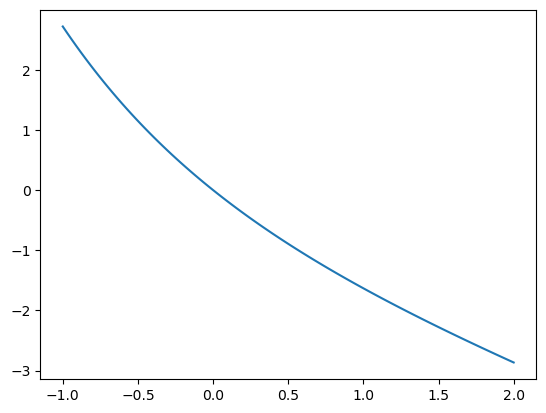

1000
Risultati bisezione
x =  -2.2737367544323206e-13  n_it =  42 all_xk =  [0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07, 4.76837158203125e-07, -2.384185791015625e-07, 1.1920928955078125e-07, -5.960464477539063e-08, 2.9802322387695312e-08, -1.4901161193847656e-08, 7.450580596923828e-09, -3.725290298461914e-09, 1.862645149230957e-09, -9.313225746154785e-10, 4.656612873077393e-10, -2.3283064365386963e-10, 1.1641532182693481e-10, -5.820766091346741e-11, 2.9103830456733704e-11, -1.4551915228366852e-11, 7.275957614183426e-12, -3.637978807091713e-12, 1.8189894035458565e-12, -9.094947017729282e-13, 4.547473508864641e-13, -2.2737367544323206e-13]
Risultati corde
x =  3.8360249906498615e-13  n_it =  10 all_xk =  [0.11726613074048065, -0.005205569568950089,

In [68]:
# inizializzazione funzioni
x = sym.symbols('x')
fs = sym.exp(-x)-(x+1)
df = sym.diff(fs,x,1)

# in questo modo lambdaifichiamo la funzione
f =lambdify(x,fs,np)
fp=lambdify(x,df,np)

a = -1
b = 2
nmax = 1000

x0 = -0.5
x1 = -0.3
tolx = 1e-12
tolf = 1e-12
# tolf serve per controllare la tolleranza rispetto al risultato della funzione
#(soluzione esatta alfa=0)

xx=np.linspace(a,b,100)
plt.plot(xx,f(xx))
plt.show()

x, n_it, all_xk = bisezione(f, a, b, tolx, nmax)
print("Risultati bisezione")
print("x = ",x," n_it = ", n_it, "all_xk = ", all_xk)
#x, n_it, all_xk = regula_falsi(f, a, b, tolx, nmax)
#print("Risultati regula_falsi")
#print("x = ",x," n_it = ", n_it, "all_xk = ", all_xk)
x, n_it, all_xk = corde(f, a, b, tolx, tolf, nmax, x0)
print("Risultati corde")
print("x = ",x," n_it = ", n_it, "all_xk = ", all_xk)
x, n_it, all_xk = newton(f, fp, a, b, tolx, tolf, nmax, x0)
print("Risultati newton")
print("x = ",x," n_it = ", n_it, "all_xk = ", all_xk)
x, n_it, all_xk = secanti(f, a, b, tolx, tolf, nmax, x1, x0)
print("Risultati secanti")
print("x = ",x," n_it = ", n_it, "all_xk = ", all_xk)


In [ ]:
def stima_ordine(xk, iterazioni):
    p = []
    # considero le ultime iterazioni
    for k in range(iterazioni-3):
        p.append(np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2])) / np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1])))
        
    ordine = p[-1]
    # quello che ci interessa è la p finale, dopo aver fatto tutte le iterazioni
    return ordine

#print("Ordine bisezione", )

#print("Ordine ",)

- Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

- Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

- Utilizzare il metodo di Newton per determinare le radici dell’equazione f (x) = 
rcatan(x) con x0 = 1.2, 1.4 assumendo tolx = 1.e − 6 e tolf = 1.e − 5. Che cos a
si osserva?

**Soluzione di sistemi non lineari**


- Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


**Sperimentazione Numerica**

Risolvere i seguenti tre sistemi non lineari:

1) 

   2x0-cos(x1)=0

   sin(x0)+2x1=0

2) 

   x0^2+x1^2-9=0

   x0+x1-3=0

3) 

   4x0^2+x_1^2=4

   x0+x1=sin(x0-x1)



array([[2.        , 0.90929743],
       [0.54030231, 2.        ]])

Servirsi del metodo grafico per individuare un 
iterato iniziale  $X_0$  nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici z1 = f1 (x0 ,x1 ) e z2 = f2(x0, x1 ) e 
definire come iterato iniziale un vettore $X_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 

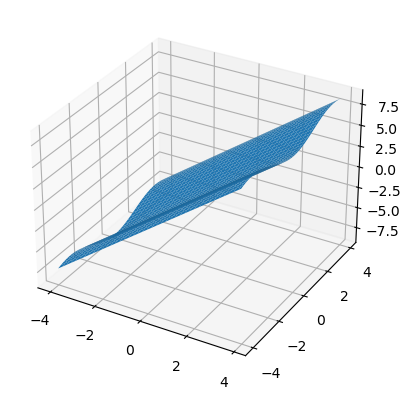

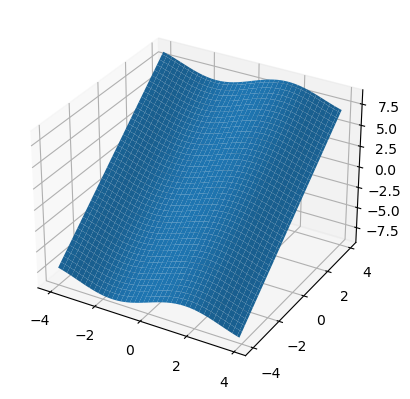

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
# serve per importare grafici 3D

F = lambda x: np.array( [ 2*x[0]-np.cos(x[1]) ,  np.sin(x[0])+2*x[1] ] )
Jac = lambda x: np.array( [ [2, np.sin(x[1])], [np.cos(x[0]), 2] ] )
x = np.array([1,2])
F(x)
Jac(x)

x = np.arange(-4-0,4.0,0.1)
# np.arange serve per discretizzare in certi intervalli
y = np.arange(-4-0,4.0,0.1)
X, Y = np.meshgrid(x,y)
# .meshgrid costruisce la griglia data dall'intersezione dei intervalli
Z1= 2*X-np.cos(Y)
Z2=np.sin(X)+2*Y
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z1)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z2)
plt.show()

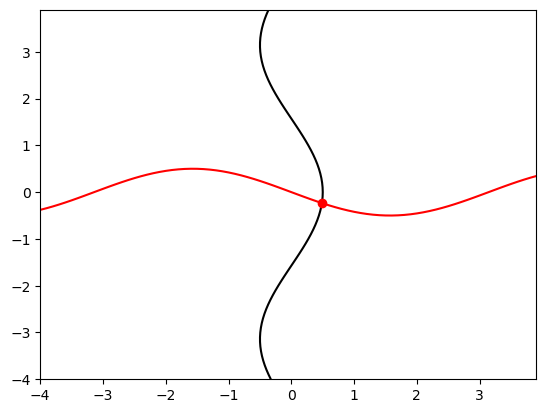

In [8]:
plt.contour(X, Y, Z1, levels=[0], colors='black')
plt.contour(X, Y, Z2, levels=[0], colors='red')
plt.show()
# questo grafico:
# rappresenta l'intersezione delle curve di livello a quota 0

In [5]:
import math

def sign(x):
    return math.copysign(1,x)

In [36]:
import matplotlib.pyplot as plt
# importa a biblioteca matplotlib
# d'ora in poi si potrà usare plt invece di scrivere matplotlib.pyplot
import math
import numpy as np

def bisezione(fname,a,b,tol,tolf):
    fa=fname(a)
    fb=fname(b)
    
    if sign(fa)*sign(fb)>=0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None,None,None
    
    # maxit=math.ceil(math.log2((b-a)/tol))-1 nel metodo di bisezione
    # maxit di solito 1000 può bastare
    maxit = 1000
    it = 0
    v_xk = []
    fxk = 100
    # (b-a)>tol nel metodo di bisezione
    while it < maxit and abs(b - a) > tol and abs(fxk) > tolf:
        # punto centrale
        #xk = a + (b-a)/2 nel metodo di bisezione
        xk = (a - fa)*(b-a)/(fa-fb)
        v_xk.append(xk)
        it = it + 1
        
        fxk=fname(xk)
        
        if fxk==0:
            return xk,it,v_xk
        
        # si continua a lavorare su [xk,b]
        if sign(fa)*sign(fxk)>0:
            a = xk
            fa = fxk
        elif sign(fxk)*sign(fb)>0: # si continua su [a,xk]
            b = xk
            fb = fxk
            
    return xk,it,v_xk


        

In [55]:
# tolx tolleranza tra iterati successivi
# tolf tolleranza della funzione
def newton(fname,fpname,x0,tolx,tolf,nmax):
    xk=[]
    fx0=fname(x0)
    d=fx0/fpname(x0)
    x1 = x0-d
    
    fx1=fname(x1)
    xk.append(fx1)
    it=1
    
    while it<nmax and abs(fx1)>=tolf and abs(d) >= tolx*abs(x1):
        x0=x1
        fx0=fname(x0)
        d=fx0/fpname(x0)
        x1 = x0-d
        fx1 = fname(x1)
        it =  it + 1
        xk.append(x1)
    
    if it == nmax:
        print("Hai raggiunto il massimo delle iterazioni")

    # x1 dove si è fermato per trovare 0
    return x1, it, xk 

        

In [46]:
import sympy as sym
from sympy.utilities.lambdify import lambdify
# trasforma in lambda function una simbolica

# Metodo di Newton per trovare gli zeri

x = sym.symbols('x')
fs=sym.exp(-x)-(x+1)
# come fare le derivate usando la libreria sympy
# attenzione è non numerica ma simbolica
# quindi c'è da trasformarla
dfs = sym.diff(fs,x,1)
print(dfs)
# funzione derivate che dobbiamo passare al metodo di Newton
fp = lambdify(x,dfs,np)
f = lambdify(x,fs,np)



-1 - exp(-x)


## Sperimentazione numerica

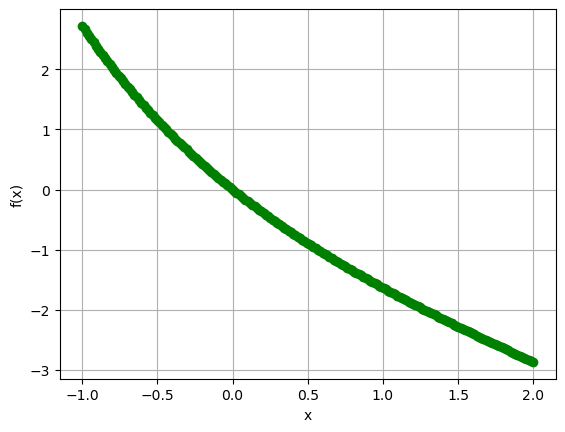

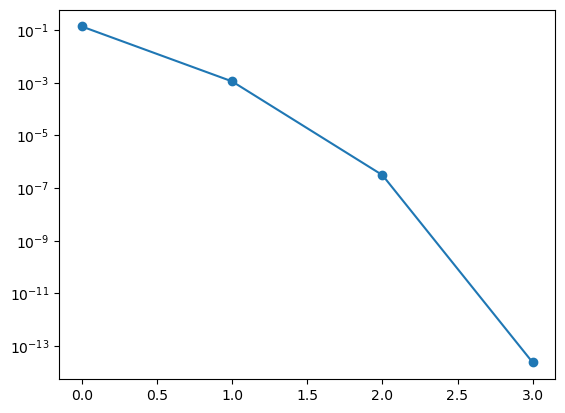

In [58]:
import matplotlib.pyplot as plt
import numpy as np

fname = lambda x: np.exp(-x)-(x+1)

a = -1
b = 2
N = 200
x = np.linspace(a,b,N)
y = fname(x)
tol = 1e-12
tolf = 1e-12


# Creazione grafico
plt.plot(x, y, 'g-o')
plt.grid(True)
plt.xlabel('x')
# xlabel assegna un'etichetta all'asse delle ascisse
plt.ylabel('f(x)')
plt.savefig("filename.jpg")  #Salva la figura in un file con formato grahico jpg
plt.show()

#zero_b,it_bis,v_vk_b=bisezione(fname, a, b, tol, tolf)
#print("zerob = ",zero_b,";numero it = ",it_bis)
alfa=0
#err_bis=np.abs(np.array(v_vk_b)-alfa)
##print(err_bis)
#plt.semilogy(range(it_bis), err_bis, 'o-')

x0=-0.5
tolx=1e-12
nmax=500
zero_n, it_n, v_xk_n = newton(f,fp,x0,tolx,tolf,nmax)
err_newton=np.abs(np.array(v_xk_n)-alfa)
plt.semilogy(range(it_n), err_newton, 'o-')


In [6]:
def my_newtonSys(fun, jac, x0, tolx, tolf, nmax):
    matjac = jac(x0)
    # controllo se il determinante della matrice è = 0
    # .linalg è un pacchetto che ti permette di calcolare det, una funzione, le norme, etc...
    if np.linalg.det(matjac) == 0:
        print("Jacobiano in x0 nullo")
        return None, None, None
    
    s = -np.linalg.solve(matjac, fun(x0))
    it = 1
    x1 = x0 + s
    
    fx1 = fun(x1)
    Xm = [np.linalg.norm(s,1)] # viene calcolata la norma 1
    
    while (it <= nmax and np.linalg.norm(fx1,1) >= tolf and np.linalg.norm(s,1) > np.linalg.norm(x1,1)*tolx):
        x0=x1
        it+=1
        matjac=jac(x0)
        
        if np.linalg.det(matjac) == 0:
            print("Jacobiano in x0 nullo")
            return None, None, None
        
        s = -np.linalg.solve(matjac, fun(x0))
        x1 = x0+s
        # la funzione sta rimpicciolendo?
        fx1 = fun(x1)
        Xm.append(np.linalg.norm(s,1))
        
    return x1, it, Xm
    

In [16]:
x0 = np.array([-1,1]) # NON può essere una lista se no da errore
nmax = 100
tolx=1e-10
tolf=1e-10
# NR = Newton Raphson
zeroNR, contNR, XmNR = my_newtonSys(F, Jac, x0, tolx, tolf, nmax)
print("Zero con Newton Rapson", zeroNR)
print("num iterazioni fatte: ", contNR)

Zero con Newton Rapson [ 0.48640515 -0.2337255 ]
num iterazioni fatte:  5


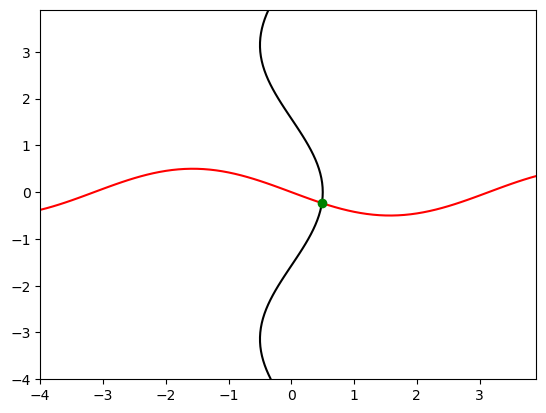

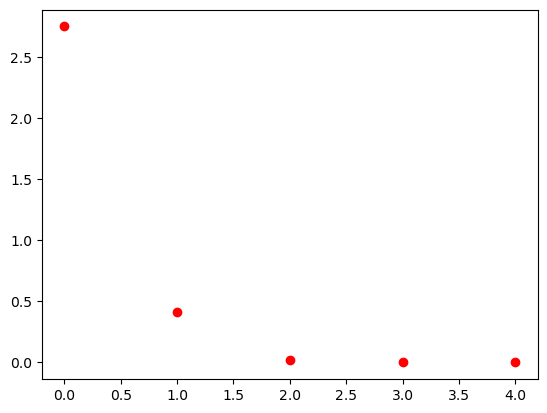

In [12]:
plt.contour(X, Y, Z1, levels=[0], colors='black')
plt.contour(X, Y, Z2, levels=[0], colors='red')
plt.plot(zeroNR[0], zeroNR[1], 'go')
plt.show()
# differenza tra iterati successivi, l'errore
plt.plot(range(contNR), XmNR, 'ro')

In [21]:
# corde NON completo secondo me ho sbagliato
def my_newtonSysCorde(fun, jac, x0, tolx, tolf, nmax):
    matjac = jac(x0)
    # controllo se il determinante della matrice è = 0
    # .linalg è un pacchetto che ti permette di calcolare det, una funzione, le norme, etc...
    if np.linalg.det(matjac) == 0:
        print("Jacobiano in x0 nullo")
        return None, None, None
    
    s = -np.linalg.solve(matjac, fun(x0))
    it = 1
    x1 = x0 + s
    m = (fun(x1) - fun(x0)) / (x1-x0)
    
    fx1 = fun(x1)
    Xm = [np.linalg.norm(s,1)] # viene calcolata la norma 1
    
    while (it <= nmax and np.linalg.norm(fx1,1) >= tolf and np.linalg.norm(s,1) > np.linalg.norm(x1,1)*tolx):
        x0=x1 - (fun(x1)/m)
        it+=1
        matjac=jac(x0)
        
        if np.linalg.det(matjac) == 0:
            print("Jacobiano in x0 nullo")
            return None, None, None
        
        s = -np.linalg.solve(matjac, fun(x0))
        x1 = x0+s
        # la funzione sta rimpicciolendo?
        fx1 = fun(x1)
        Xm.append(np.linalg.norm(s,1))
        
    return x1, it, Xm

In [22]:
x0 = np.array([-1,1]) # NON può essere una lista se no da errore
nmax = 100
tolx=1e-10
tolf=1e-10
# NR = Newton Raphson
zeroNR, contNR, XmNR = my_newtonSysCorde(F, Jac, x0, tolx, tolf, nmax)
print("Zero con Newton Rapson", zeroNR)
print("num iterazioni fatte: ", contNR)

Zero con Newton Rapson [ 0.48640515 -0.2337255 ]
num iterazioni fatte:  5
